# EDA and Feature Engineering

## Imports

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

In [5]:
train = pd.read_csv("../datasets/clean_train.csv")

In [4]:
pd.options.display.max_columns = 135

In [5]:
train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmtfin_sf_1,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_Blmngtn,neighborhood_Blueste,neighborhood_BrDale,neighborhood_BrkSide,neighborhood_ClearCr,neighborhood_CollgCr,neighborhood_Crawfor,neighborhood_Edwards,neighborhood_Gilbert,neighborhood_Greens,neighborhood_GrnHill,neighborhood_IDOTRR,neighborhood_Landmrk,neighborhood_MeadowV,neighborhood_Mitchel,neighborhood_NAmes,neighborhood_NPkVill,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_NridgHt,neighborhood_OldTown,neighborhood_SWISU,neighborhood_Sawyer,neighborhood_SawyerW,neighborhood_Somerst,neighborhood_StoneBr,neighborhood_Timber,neighborhood_Veenker,bsmt_qual_Ex,bsmt_qual_Fa,bsmt_qual_Gd,bsmt_qual_Po,bsmt_qual_TA,bsmt_cond_Ex,bsmt_cond_Fa,bsmt_cond_Gd,bsmt_cond_Po,bsmt_cond_TA,bsmt_exposure_Av,bsmt_exposure_Gd,bsmt_exposure_Mn,bsmt_exposure_No,bsmtfin_type_1_ALQ,bsmtfin_type_1_BLQ,bsmtfin_type_1_GLQ,bsmtfin_type_1_LwQ,bsmtfin_type_1_Rec,bsmtfin_type_1_Unf,bsmtfin_type_2_ALQ,bsmtfin_type_2_BLQ,bsmtfin_type_2_GLQ,bsmtfin_type_2_LwQ,bsmtfin_type_2_Rec,bsmtfin_type_2_Unf
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,533.0,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,637.0,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,Gd,CBlock,731.0,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,0.0,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,NaN,0.0,TA,TA,PConc,0.0,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1

## EDA

In [12]:
vital = train[["lot_area", "1st_flr_sf", "2nd_flr_sf", "bsmtfin_sf_1", "bsmtfin_sf_2", "bsmt_unf_sf", "bsmt_full_bath", "bsmt_half_bath", "neighborhood_Blueste", "neighborhood_CollgCr", "neighborhood_Crawfor", "neighborhood_Edwards", "neighborhood_MeadowV", "neighborhood_NAmes", "neighborhood_NoRidge", "neighborhood_SWISU", "neighborhood_Sawyer", "neighborhood_SawyerW", "bsmt_qual_Ex", "bsmt_qual_Gd", "bsmt_qual_TA", "bsmt_cond_Ex", "bsmt_cond_Gd", "bsmt_exposure_Av", "bsmt_exposure_Gd", "bsmtfin_type_1_GLQ", "bsmtfin_type_1_ALQ", "bsmtfin_type_2_GLQ", "bsmtfin_type_2_ALQ", "bsmtfin_type_2_Rec", "saleprice"]]

In [13]:
vital.corr(numeric_only = True)["saleprice"].sort_values()
# This provides correlational values for all of the defined vital features that are necessary to answering the problem statement

bsmt_qual_TA           -0.457801
neighborhood_NAmes     -0.189739
neighborhood_Edwards   -0.176367
neighborhood_Sawyer    -0.133899
neighborhood_MeadowV   -0.111672
bsmtfin_type_1_ALQ     -0.088407
neighborhood_SWISU     -0.074324
bsmt_half_bath         -0.045468
bsmtfin_type_2_Rec     -0.043192
neighborhood_Blueste   -0.025271
bsmt_cond_Ex            0.006514
bsmtfin_type_2_ALQ      0.011724
bsmtfin_sf_2            0.016255
neighborhood_SawyerW    0.016582
bsmtfin_type_2_GLQ      0.053485
neighborhood_Crawfor    0.058290
neighborhood_CollgCr    0.082149
bsmt_cond_Gd            0.114147
bsmt_exposure_Av        0.126262
bsmt_unf_sf             0.190210
bsmt_qual_Gd            0.226430
2nd_flr_sf              0.248101
neighborhood_NoRidge    0.263407
bsmt_full_bath          0.282978
lot_area                0.296328
bsmt_exposure_Gd        0.376987
bsmtfin_sf_1            0.423519
bsmtfin_type_1_GLQ      0.463374
bsmt_qual_Ex            0.586553
1st_flr_sf              0.618380
saleprice 

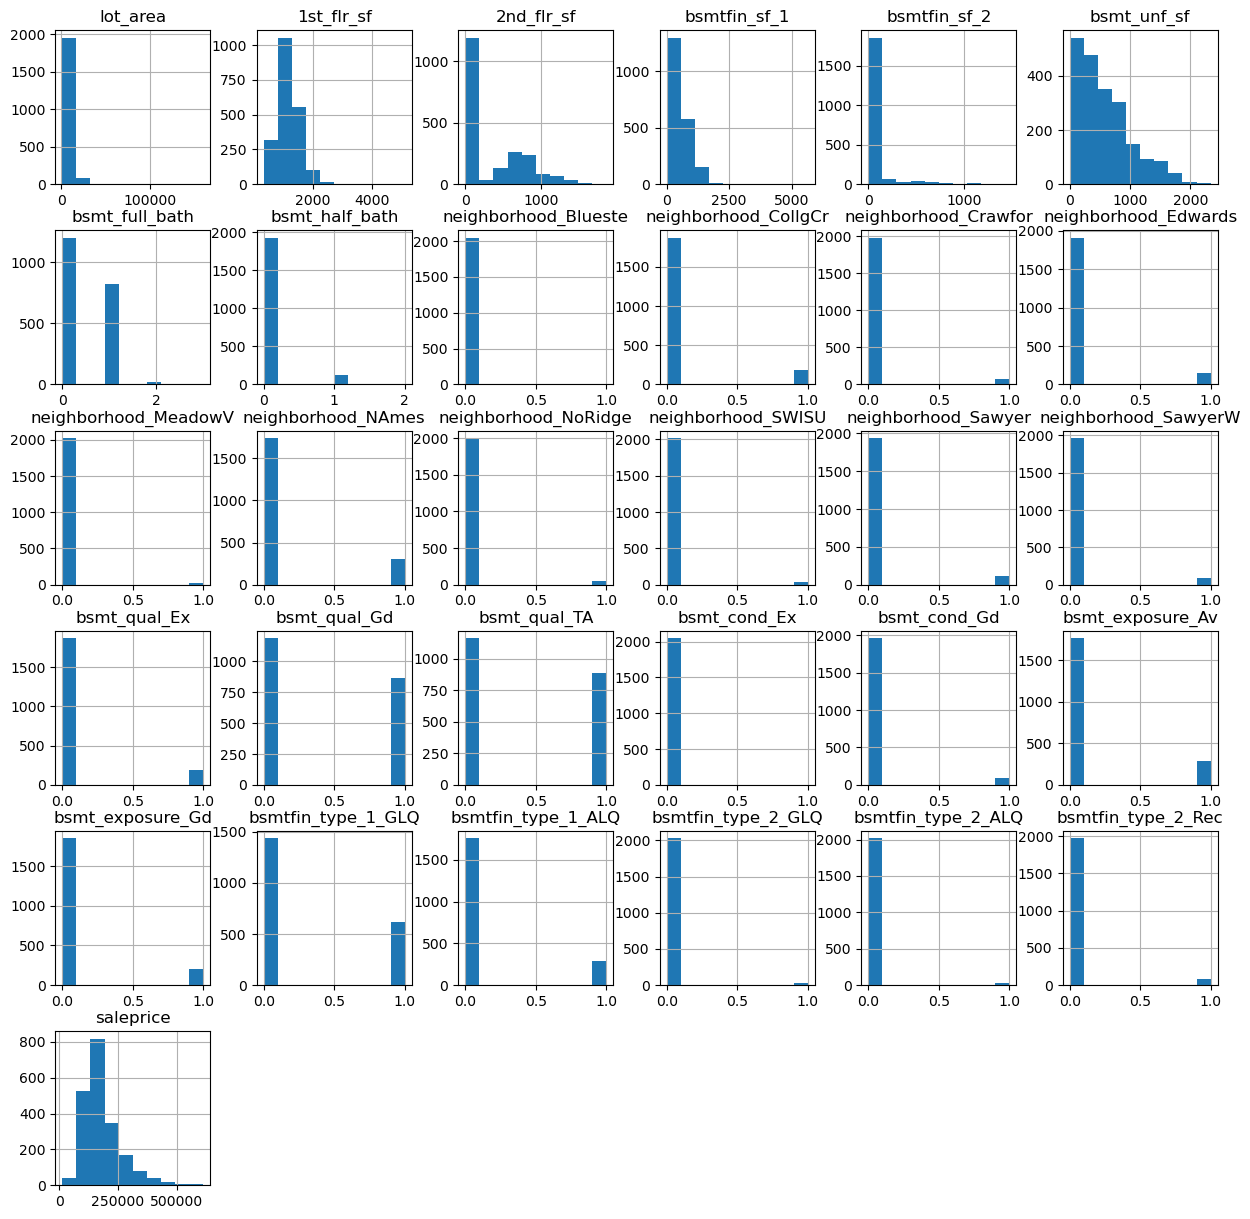

In [26]:
vitalh = vital.hist(figsize=(15,15))
plt.savefig("../images/vitalhist.png");

Despite relevance to the problem statement, bsmt_cond_Ex and neighborhood_Blueste do not appear to contain any positive values, so they will not be in the final feature list. Additionally, not enough homes have a second basement type, so variables related to secondary basement types will be omitted.\
\
The area features are skewed left due to possible large-area outlier homes, likely also on the upper end of the sale price variable.

In [15]:
train["lot_area"].sort_values()

1509      1300
1543      1470
53        1476
787       1477
1446      1484
         ...  
745      57200
960      63887
1853     70761
694     115149
471     159000
Name: lot_area, Length: 2050, dtype: int64

lot_area contains some large outliers, which likely correspond to large outliers in other features.

In [16]:
vital_lot_area_no_large_outliers = vital[vital["lot_area"] <= 17000]
# Creates subset without massive outlier lot sizes, fixes heavy left-side skew for lot_area, as well as partially fixing skew for other variables

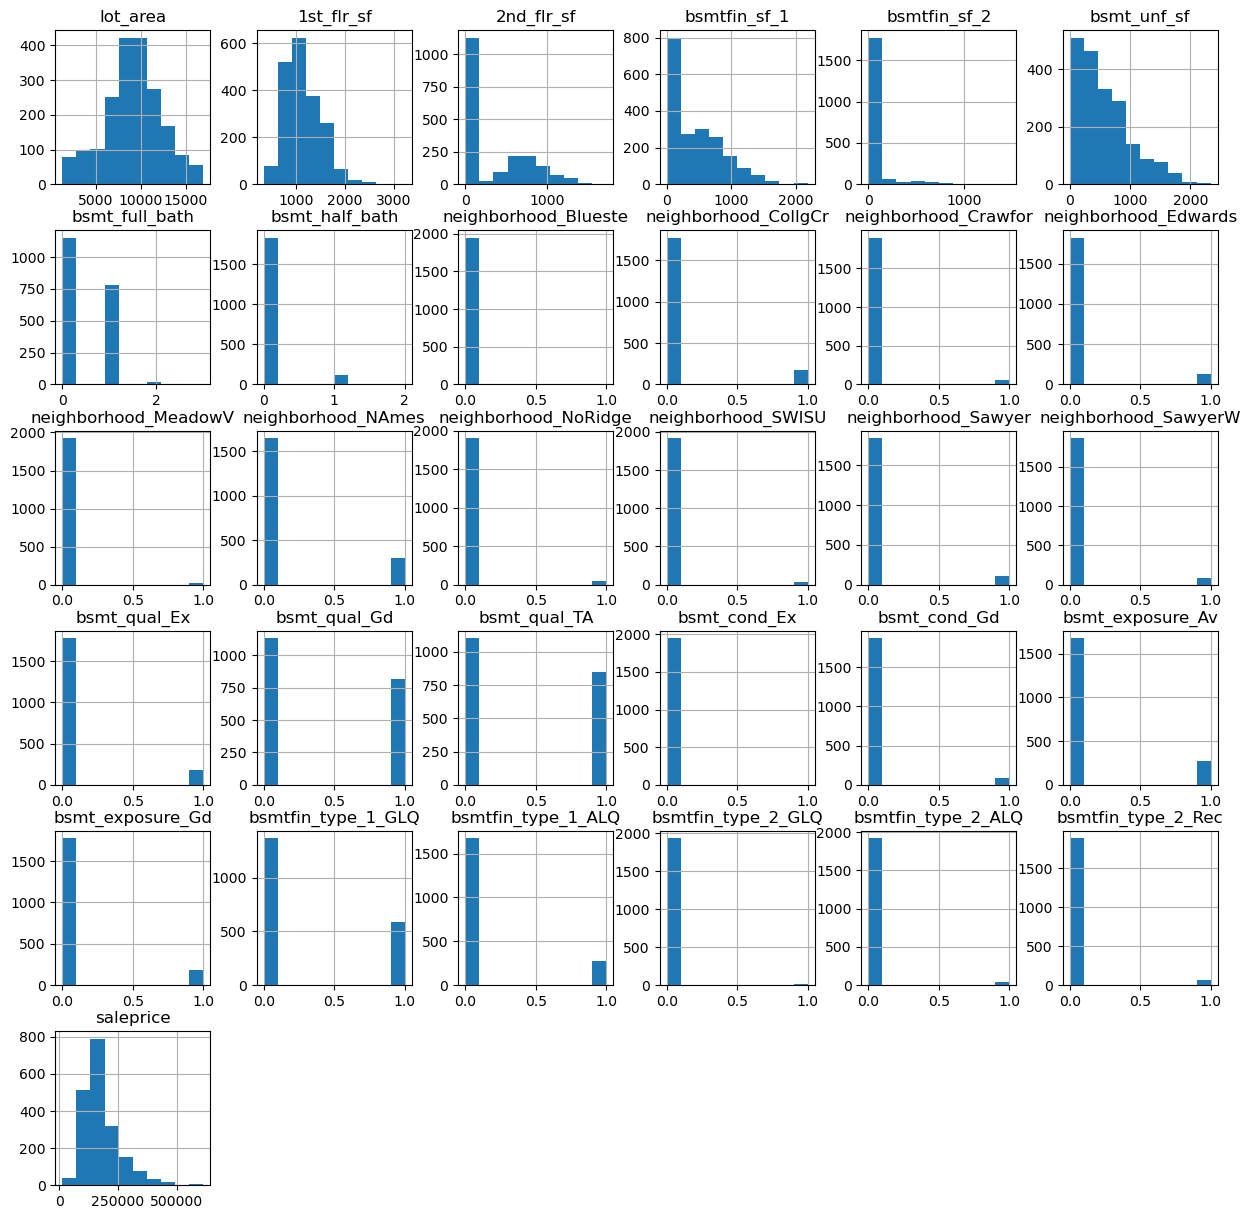

In [27]:
vital_lot_area_no_large_outliers.hist(figsize=(15,15))
plt.savefig("../images/managedoutlierhist.png");

In [18]:
vital_lot_area_no_large_outliers["lot_area"].sort_values()

1509     1300
1543     1470
53       1476
787      1477
1446     1484
        ...  
1296    16770
1975    16770
620     16870
489     16900
666     16905
Name: lot_area, Length: 1951, dtype: int64

In [29]:
vital_truenumeric = vital_lot_area_no_large_outliers[["lot_area", "1st_flr_sf", "2nd_flr_sf", "bsmtfin_sf_1", "bsmtfin_sf_2", "bsmt_unf_sf", "saleprice"]]
# This creates a dataframe of the vital numeric, non-dummy features and sale price in order to establish any possible correlations and interactions that can be investigated.

c:\Users\domin.DESKTOP-S15RK6B\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


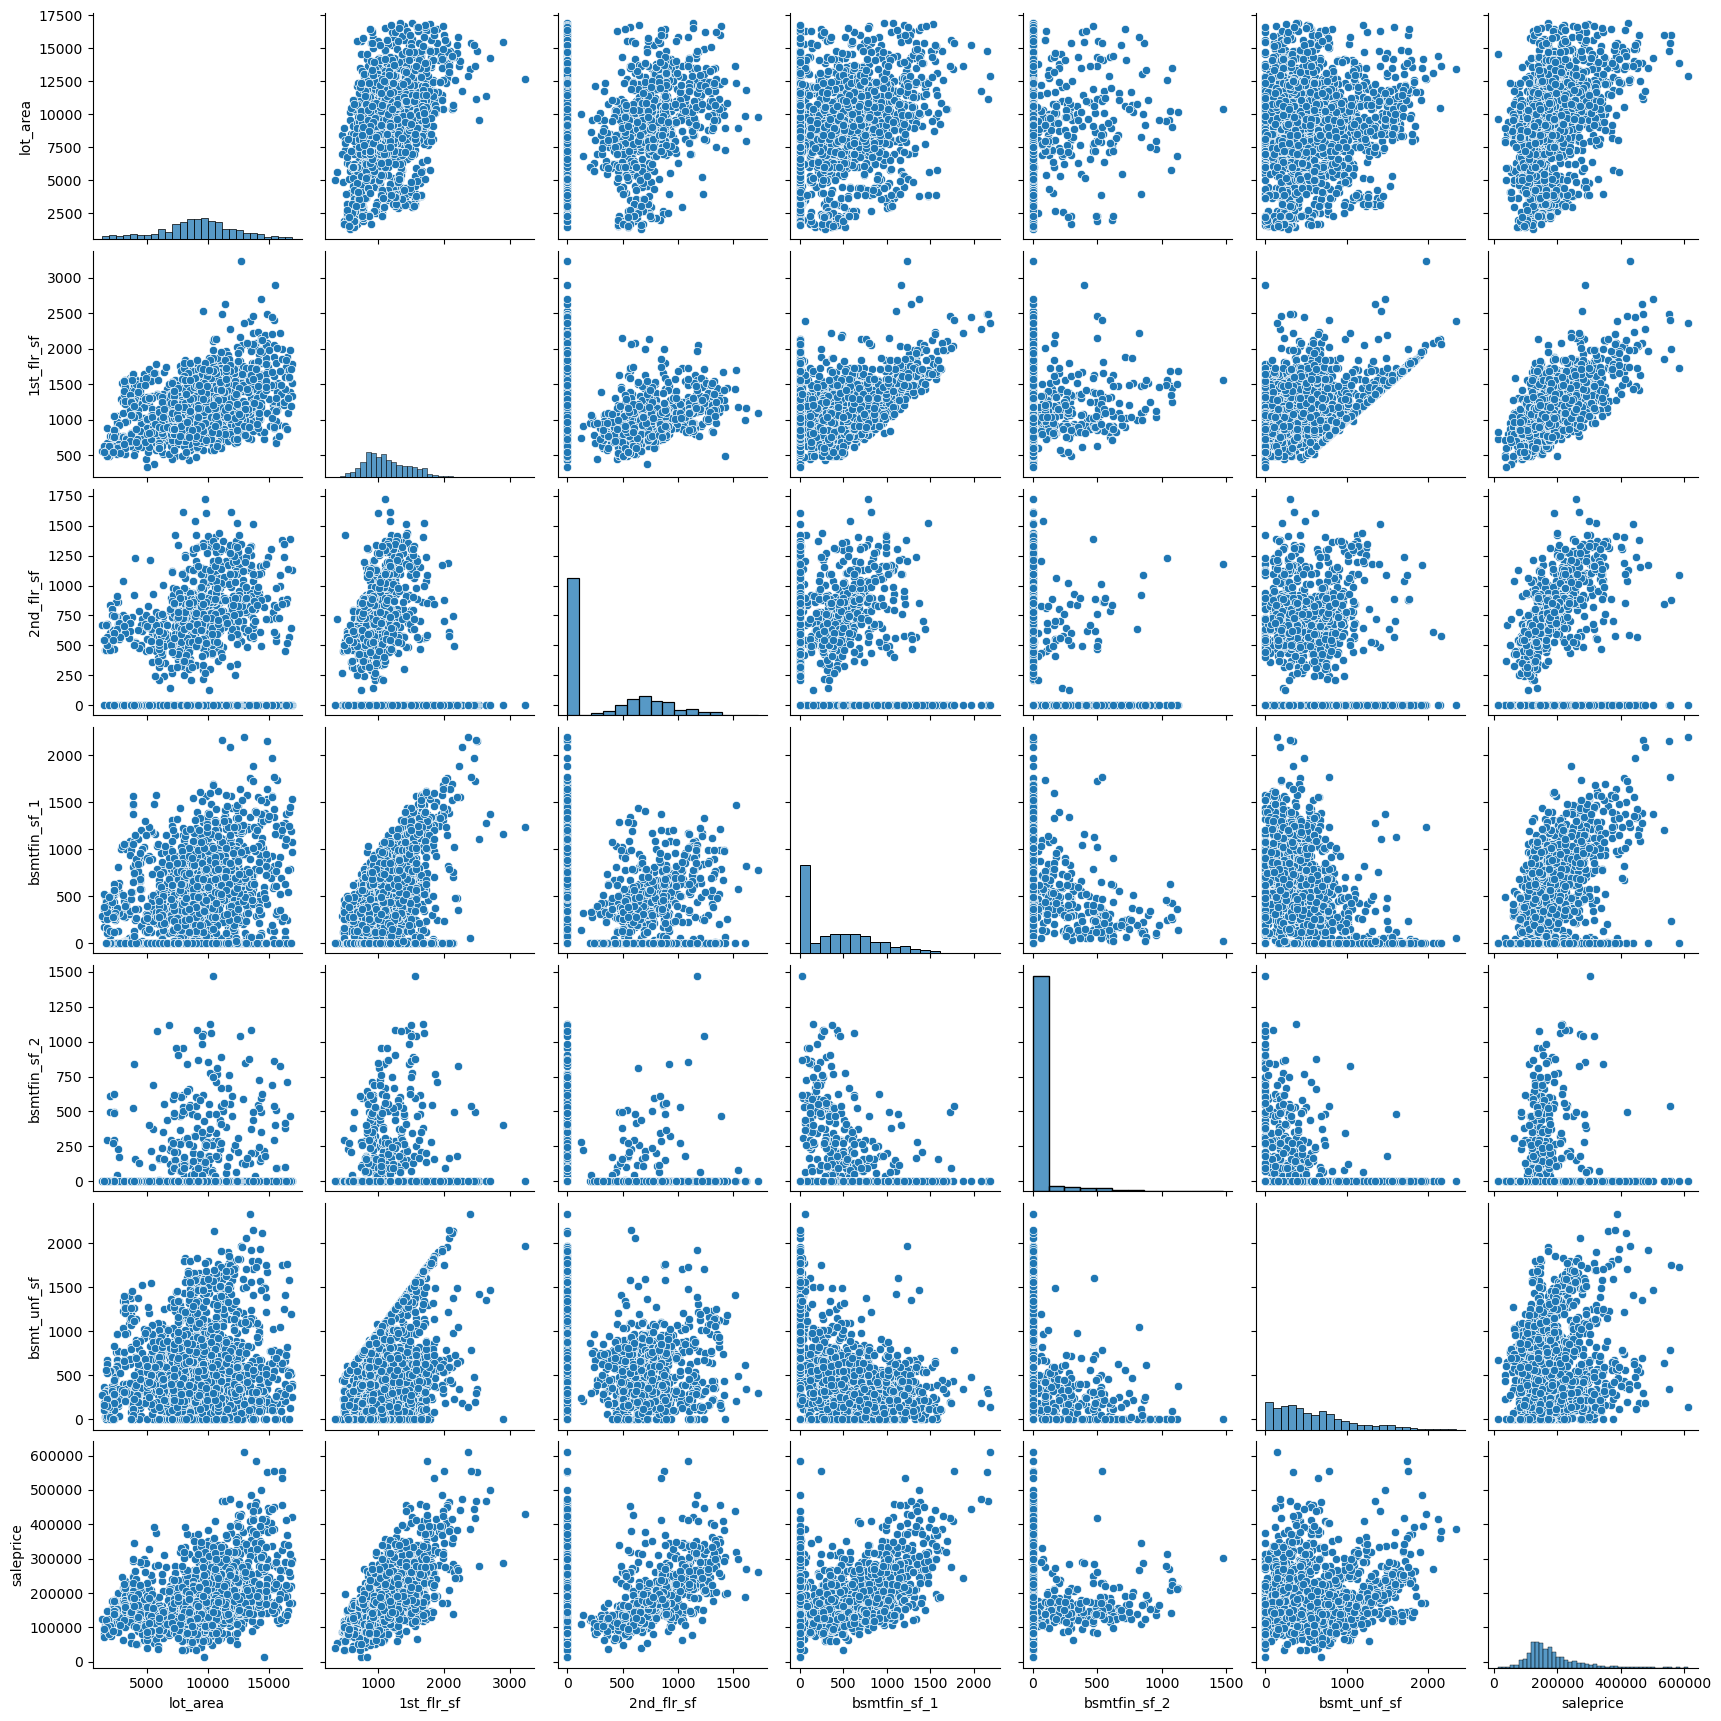

In [30]:
sns.pairplot(vital_truenumeric)
plt.savefig("../images/vitalpairs.png");
# Only using pairplot for true numeric values in order to avoid overcrowding

In the above pairplot, 1st_flr_sf and bsmtfin_sf_1 seem to have similar correlations to saleprice, so it may be helpful to create an interaction term for the two features.

## Feature Engineering

In [11]:
train["1stflr_bsmtfin1_sf"] = train["1st_flr_sf"] * train["bsmtfin_sf_1"]
# Creates interaction term of 1st floor and finished basement square footage

## Feature Definition

In [84]:
features = ["lot_area", "1st_flr_sf", "2nd_flr_sf", "bsmtfin_sf_1", "bsmt_unf_sf", "1stflr_bsmtfin1_sf", "bsmt_full_bath", "bsmt_half_bath", "neighborhood_CollgCr", "neighborhood_Crawfor", "neighborhood_Edwards", "neighborhood_MeadowV", "neighborhood_NAmes", "neighborhood_NoRidge", "neighborhood_SWISU", "neighborhood_Sawyer", "neighborhood_SawyerW", "bsmt_qual_Ex", "bsmt_qual_Gd", "bsmt_qual_TA", "bsmt_cond_Gd", "bsmt_exposure_Av", "bsmt_exposure_Gd", "bsmtfin_type_1_GLQ", "bsmtfin_type_1_ALQ"]

The features chosen include square footage of living spaces and basements, as well as lot size, and neighborhoods with (presumed based on research) proximity to Iowa State University. They also include higher than average quality basement features and features indicating that the basement in a home may be a viable living space for a tornado shelter space.\
Citations for neighborhood research: https://www.rent.com/iowa/ames/bluestem-neighborhood, https://www.rent.com/iowa/ames/crawford-neighborhood, https://www.rent.com/iowa/ames/edwards-neighborhood, https://www.rent.com/iowa/ames/meadow-village-neighborhood, https://www.rent.com/iowa/ames/north-ames-neighborhood, https://www.rent.com/iowa/ames/northridge-neighborhood, https://www.rent.com/iowa/ames/sawyer-neighborhood, https://www.rent.com/iowa/ames/sawyer-west-neighborhood

In [86]:
train.to_csv("../datasets/engineered_train.csv", index=False)